# Intro
## Background

The below guide is based on the package PYGTM build by Philippe Miron, which uses Markov based prediction to assess future locations for particles in the ocean. <br>
The package uses predfined real drifter data and the full details and tutorial for it is available here: <br>
https://github.com/philippemiron/pygtm

Recommended papers to go with it:
- [Lagrangian Geography of the Deep Gulf of Mexico](https://journals.ametsoc.org/view/journals/phoc/49/1/jpo-d-18-0073.1.xml)
- [Markov-chain-inspired search for MH370](https://arxiv.org/pdf/1903.06165)


## General Idea
The general idea for this construct is as follows:
- We have multiple particles (with ids) in a 2D space where we know their location (x,y) over a set period of time (t). Thus, we have their track and can trace it.
- We can split the area of interest (usually the area in which the particles move) to "boxes" or "bins", based on our wishes.
- We can then know the number of particles in each bin, enabling an option to create a "probability" for each bin.
- This will give us the transition matrix for assessing the possible locations for the particles in future time.  
- We then can create a heatmap for dispersion prediction.

In this guide and future use, we pretty much use the package as inteded, but with complete data and an ability to assess the error of the prediction.


Let's see a short example for this concept and then dig in.
___

## Example 

At the first moment (t0), we have 3 bins one next to the other and 5 particles.
All 5 particles are currently at bin 2.

At the last moment (tf), the particles moved and spread as follows: 
- Bin 1 has 2 particles.
- Bin 2 has 1 particle.
- Bin 3 has 2 particles.

Meaning the probability at (tf) would be: -
- Bin 1 with 40%
- Bin 2 with 20%
- Bin 3 with 40%

The particles can be anywhere at the bin and will be contained in it as long as the particle location is within it's borderes.

Let's plot it.

### Imports

We will first need to import a few vital packages for this to work. <br>
Please also make sure that the package for `pygtm` folder with the .py files are at the parent folder of where this file is saved. <br>
If we are at `/pygtm-main/tutorials/"this-guide-name".ipynb` then the pygtm file should be located at this location: `/pygtm-main/pygtm`
Alternatively, you can change line `sys.path.insert(0, '../')` to match based on the folder location.


In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# This is going back a folder and then searching for Miron's PYGTM package - as it's stored locally and not installed in the environment.
sys.path.insert(0, '../') 
from pygtm.physical import physical_space

### Definitions 

Now let's define the space that we want to work within.
We will set the following parameters:
* spatial_dis - number of bins in the the meridional direction (the number in the zonal direction is fixed to have almost square bin)
* lon - min and max longitude value of the initial domain
* lat - min and max latitude value of the initial domain

For now it's arbitrary, but in future uses we should match it to the area in which we have our particles move or general area of interest. <br>
This sets the general boundries of the presented plot and we will later on also have an option to choose the area for which to calculate probabilities for. <br>

**IMPORTANT:** Once the transition matrix is calculated, the empty bins are removed automatically.

In [2]:
spatial_dis = 75
lon = [-98, 35]
lat = [-10, 80]

### Creating the grid and plotting
Let's run for the first time a function from the pygtm package - which will create our grid and bins

In [24]:
# This creates the grid and bins based on the above selected parameters, using physical_space from pygtm
d = physical_space(lon, lat, spatial_dis)

Now we have d, which is the space created based on the parameters that were given and split into bins. <br>
We can choose three bins and plot them at t0 and tf.

Let's select 3 bins and set them as b1, b2, b3 using this syntax: `d.bins[bin_id]`
We will need to select a bin id that exists, else we will get an error.
How can we know what is the number of bins? Run the following and you should get the upper limit for a bin id.

In [25]:
# Bins upper limit
d.bins.shape[0] -1 ### > output should be 3625 and that's the highest value for bin id.


3625

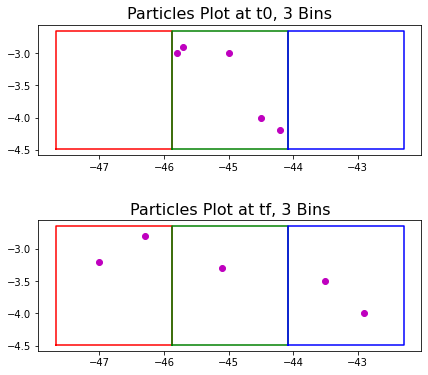

In [26]:
# Selecting bins to plot
b1 = d.bins[250]
b2 = d.bins[251]
b3 = d.bins[252]

# We will reorder the borders to create a square closed loop for the outlines
b1 = b1[np.array([0,1,3,2,0])]
b2 = b2[np.array([0,1,3,2,0])]
b3 = b3[np.array([0,1,3,2,0])]

# Let's add some particles for this example at t0
scatter_particles_t0 = np.array([
    [-45, -3],
    [-45.8, -3],
    [-44.5, -4],
    [-44.2, -4.2],
    [-45.7, -2.9]
])

# ... and at tf
scatter_particles_tf = np.array([
    [-47, -3.2],
    [-45.1, -3.3],
    [-43.5, -3.5],
    [-42.9, -4],
    [-46.3, -2.8]
])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

# Plot the first set of bins and particles at t0
ax1.plot(d.coords[b1, 0], d.coords[b1, 1], color='r')
ax1.plot(d.coords[b2, 0], d.coords[b2, 1], color='g')
ax1.plot(d.coords[b3, 0], d.coords[b3, 1], color='b')
ax1.scatter(scatter_particles_t0[:, 0], scatter_particles_t0[:, 1], color='m', marker='o', label='Scatter Particles')
ax1.set_aspect('equal', adjustable='box')
ax1.set_title("Particles Plot at t0, 3 Bins", fontsize=16)

# Plot the second set of bins and particles at tf
ax2.plot(d.coords[b1, 0], d.coords[b1, 1], color='r')
ax2.plot(d.coords[b2, 0], d.coords[b2, 1], color='g')
ax2.plot(d.coords[b3, 0], d.coords[b3, 1], color='b')
ax2.scatter(scatter_particles_tf[:, 0], scatter_particles_tf[:, 1], color='m', marker='o', label='Scatter Particles')
ax2.set_aspect('equal', adjustable='box')
ax2.set_title("Particles Plot at tf, 3 Bins", fontsize=16)

plt.show()

So, if we started at Bin 2, and want to see the probability after time t, we will get that we have 40% to be at Bin 1 or Bin 3 and only 20% to be at Bin 2.

This should demonstrate the general idea of this package and use, through a simplified example (though without heatmap visualization). <br>
For more information on structuring of the bins and examples of searching elements withing the bins see the tutorials in the package - `01-physical_domain.ipynb` and `02-search_elements.ipynb`.

___

# Data Modification

As we are using artificial data, we don't have to make any corrections to the trajectories of the particles.
We only need to modify it to fit the structure the package is looking for.

Let's consider our starting data - `EMed300m_his_prt_data_bc_winter.nc`
We have 10,000 particles with an x,y location for 418 different time slots.
The starting time for this data is 29/01/2018 01:00, and we have time jumps of 2 hours.

We have here our first hidden issue with this package - and that is that our data changes by the hour and the calculation made by the package are sampled daily.
Let's call this the _"Sampling Issue in dataset.py"_ and get back to it later.

So, for 418 time points and 10,000 particles we basically get $ 4 \times 10^6 $ of data entries which is a good start. <br>
We need to do 2 things to start working with it:
1. We  need to convert our time formats to datenum, which is a format used in matlab. It counts days from the start time at year 0 month 1 day 1 (which return the value 1). 
2. Our NC files are masked arrays, and we need to remove the masking values and keep only the float values in array format.

## Datenum conversion

For the time convertion, we will base our function on the `datetime.toordinal()` function, which return the value 1 for year 1, month 1, day 1. <br>
We will later on create a list of timestamps which is identical for all the particles, as with this data the running time is the same.
We are also converting the hours to datenum format, if you were wondering.

### Imports

In [ ]:
from datetime import datetime as dt, timedelta as td

### Relevant code

In [30]:
# Convert a stripped date to a datenum using datetime as dt
def datenum(stripped_date):
    days = 365 + d.toordinal()
    hours = (stripped_date - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)
    return days + hours

d = dt.strptime('29/01/2018 01:00','%d/%m/%Y %H:%M')
start_time = datenum(d)

# Print for example
print(start_time)


# Reverse function for your comfort and validation, using datetime as dt and timedelta as td
def numdate(num):
    days = num - 365
    whole_days = int(days)
    fractional_days = days - whole_days
    date = dt.fromordinal(whole_days)
    time_delta = td(seconds=fractional_days * 24 * 60 * 60)
    return date + time_delta

# Print for example
num = 737088.0416666666
reveresed_date = numdate(num)
print(reveresed_date)

737088.0416666666
2018-01-29 00:59:59.999997


## Masked Arrays Cleanup

For our masked arrays, we will basically create compressed lists to remove all the unwanted values. <br>
There might be a better and cleaner way to do this. <br>
**IMPORTANT:** we are loading our base file here - change the location to access it if needed.

### Imports

In [15]:
import netCDF4 as nc
import numpy as np

### Relevant Code

In [23]:
# Loading the file and reading the dataset for the particle locations, change it based on the file location locally
Med_particle = '../Data/EMed300m_his_prt_data_bc_winter.nc'

# Creating a dataset
ds_Med_particle = nc.Dataset(Med_particle)

# Reading and naming the variables 
lon_par = ds_Med_particle['lon'][:]
lat_par = ds_Med_particle['lat'][:]
id_par = ds_Med_particle['trajectory'][:] # Acts as an ID as the data matches - if something changes with this field it needs to be reevaluated
time_par = ds_Med_particle['time'][:]

# For the time list - we will create a list starting from 0 and raising by 2/24 at each step, with a length of 418. 
# Starting with the start time defined above
time_jump = (2/24) 
time_list = np.arange(0, 418) * time_jump + start_time

# Print the following to see the list created
# print(time_list)

# Create empty lists to store data
d_id = []
x = []
y = []
t = []

# Loop through each particle - through the 10,000
for i in range(time_par[:, 0].size):
    # Append trajectory ID
    d_id.append(id_par[i].compressed().tolist())
    
    # Append longitude
    x.append(lon_par[i].compressed().tolist())
    
    # Append latitude
    y.append(lat_par[i].compressed().tolist())
    
    # Append corresponding times (using the same list for all particles)
    t.append(time_list)

# Concatenate lists to create arrays
d_id = np.concatenate(d_id)
x = np.concatenate(x)
y = np.concatenate(y)
t = np.concatenate(t)

# Print sizes for debugging, they should all be the same size (4180000)
# print(d_id.size, x.size, y.size, t.size)



Now that we're done with that - let's regroup on the days/hours issue, or:

## Sampling Issue in dataset.py

As said earlier, we have 418 points of time, each with a time difference of 2 hours.
But, the code that creates the probabilites is checking the data once a day, and we are missing a wide amount of data.

The total time we have data for in the added nc file is 34.75 days.
So without modifying dataset, the code will consider 33 points of data - from day 1 to day 34. 
The incomplete day is discarded, and day zero is the starting point.
So from 418 points of time, only 33 are taken into consideration, which is a very big drop

The way to overcome this is by modifying the `dataset.py` file and changing the `oversampling` value to 12 instead of 1.
We will still lose some data, but now the transition matrix will include all the different time points we have throughout the day.

This way, we get the code to consider 397 points of time: 
- 9 are the equivalent of the 0.75 day that's incomplete (still discarded)
- 12 are the equivalent of the first day that is the basis for the offset (required to discard for it to work)

Suprisingly, the difference isn't huge, but we do see differences in both the scale of values for the probabilities as well as in the scope of bins that are not empty over time (meaning that a particle is passing through that bin at least one time).

Plot explanation:
 - White area - ocean
 - Grey area - land
 - Greyed pixels - bins that at least one particle has passed through
 - Darker grayed box - starting locations of the 10,000 particles that we ran our data on
 - Blue cross - predict dispersion assuming we start at this location (X marks the spot)


With dataset unmodified we get:
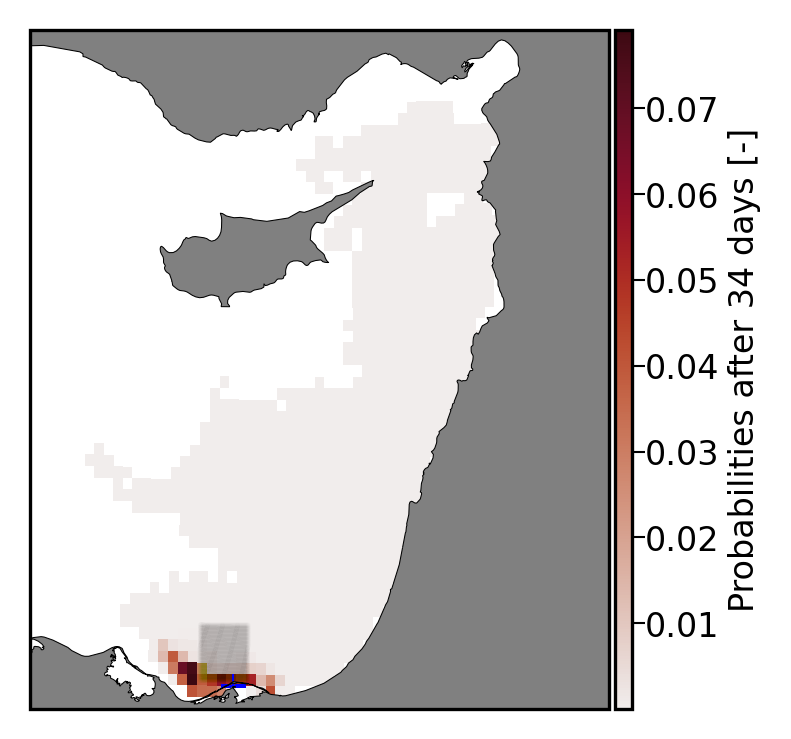


With dataset modified we get:
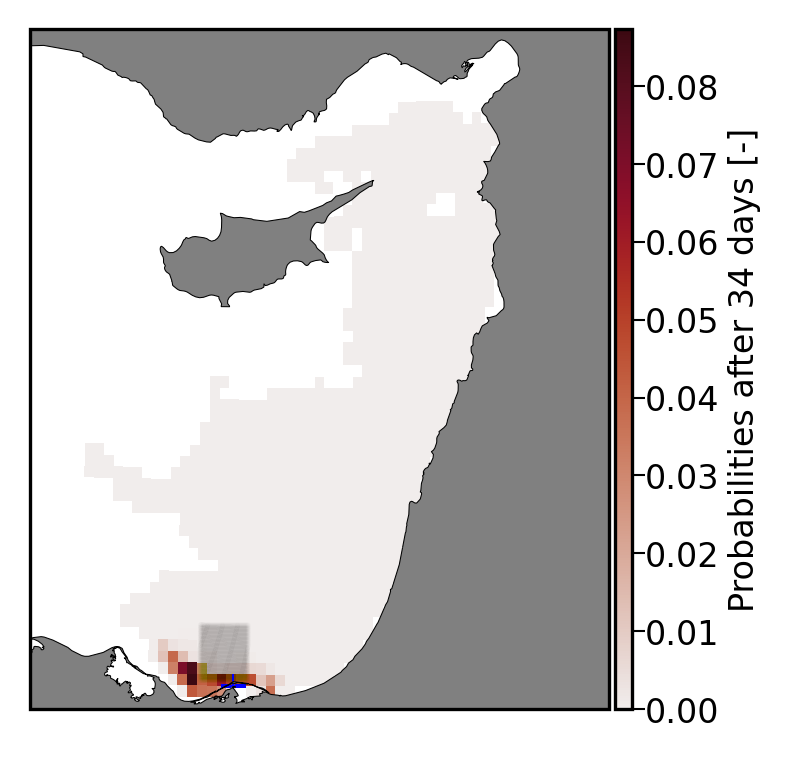


**IMPORTANT** In the future, it might be needed to modify the code (`dataset.py`) completely and convert it be to hour based and not day based.  

In order to use the modified dataset with the oversampeling, we will import the below for the next notebook:

In [ ]:
from pygtm.dataset import trajectory # This is the original version of dateset with no oversampling
from pygtm.dataset2 import trajectory as trajectory2 # This is the oversampeling version of dataset 

# Summary
We now have everything we need to create the `data` object that the pygmt enables us to create and work with it.
We are now able to:
1. Plot trajectories (explained further in `03-trajectoires.ipynb`)
2. Calculate eignevalues and eignvectors (explained further in `04-transition_matrix.ipynb`)
3. Plot predictions for future time (explained further in `05-push_forward.ipynb`)
4. Plot Lagrangian Geography (explained further in `06-lagrangian_geography.ipynb`)

The next guide notebook will focus on plotting trajectories and on prediction (push forward).
We will also reflect on what happens when you lower the data points available by scale.

Now we can run:


In [ ]:
# Using trajectory from dataset from pygtm
data = trajectory2(x,y,t,d_id)